In [ ]:
manager.trigger_nas_processing()

In [6]:
# duck db
import duckdb

In [9]:
conn = duckdb.connect(database="/mnt/AI_NAS/datalake/catalog/**/*.parquet", read_only=True)

IOException: IO Error: Cannot open database "/mnt/AI_NAS/datalake/catalog/**/*.parquet" in read-only mode: database does not exist

In [ ]:
result = conn.execute("""
    SELECT * FROM read_parquet('/mnt/AI_NAS/datalake/catalog/provider=*/dataset=*/task=*/variant=*/**/data.parquet', union_by_name=True)
""").fetchdf()

In [108]:
from openai import OpenAI
import time

openai_api_key = "EMPTY"
openai_api_base = "http://localhost:9064/v1"
client = OpenAI(
    api_key=openai_api_key,
    base_url=openai_api_base,
)

In [109]:
# print model

models = client.models.list()
for model in models.data:
    print(model.id)

2025-06-13 16:01:24,789 - httpx - INFO - HTTP Request: GET http://localhost:9064/v1/models "HTTP/1.1 200 OK"


Qwen2.5-VL-3B
adapter


In [143]:
import base64

def base64_encode(
    image_path,
):
    with open(image_path, "rb") as image_file:
        image_bytes = image_file.read()
    return base64.b64encode(image_bytes).decode("utf-8")
image_path = "/home/kai/workspace/DeepDocs_Project/datalake/managers/test4.jpg"
base64_image = base64_encode(
    image_path,
)
    
messages = [
        {
            "role": "user",
            "content": [
                {
                    "type": "text",
                    "text": "Extract all layout elements. Reading order does not matter.",
                },
                {
                    "type": "image_url",
                    "image_url": {
                        "url": f"data:image/jpeg;base64,{base64_image}",
                    },
                },
            ],
        },
    ]

In [144]:


start_time = time.time()
completion = client.chat.completions.create(
    model="adapter",
    messages=messages,
    temperature=0.0,
)
end_time = time.time()
elapsed_time = end_time - start_time
tokens = completion.usage.total_tokens
tokens_per_second = tokens / elapsed_time
print(f"Elapsed time: {elapsed_time:.2f} seconds")
print(f"Tokens: {tokens}")
print(f"Tokens per second: {tokens_per_second:.2f}")

2025-06-13 16:08:45,466 - httpx - INFO - HTTP Request: POST http://localhost:9064/v1/chat/completions "HTTP/1.1 200 OK"


Elapsed time: 4.99 seconds
Tokens: 2932
Tokens per second: 587.67


In [145]:
result = completion.choices[0].message.content

In [153]:
target

[{'type': 'plain_text', 'bbox': [307, 189, 854, 216]},
 {'type': 'plain_text', 'bbox': [101, 230, 1064, 394]},
 {'type': 'plain_text', 'bbox': [101, 408, 1064, 464]},
 {'type': 'plain_text', 'bbox': [101, 478, 1064, 569]},
 {'type': 'plain_text', 'bbox': [458, 656, 704, 683]},
 {'type': 'plain_text', 'bbox': [101, 700, 1064, 791]},
 {'type': 'plain_text', 'bbox': [101, 805, 1064, 900]},
 {'type': 'plain_text', 'bbox': [472, 986, 692, 1013]},
 {'type': 'plain_text', 'bbox': [101, 1027, 1064, 1088]},
 {'type': 'plain_text', 'bbox': [101, 1099, 1064, 1231]},
 {'type': 'plain_text', 'bbox': [424, 1318, 736, 1345]},
 {'type': 'plain_text', 'bbox': [101, 1360, 1064, 1528]}]

In [169]:
from transformers import Qwen2VLImageProcessor

In [170]:
processor = Qwen2VLImageProcessor.from_pretrained("/mnt/AI_NAS/AI_MODEL/checkpoints/Qwen/Qwen2.5-VL-3B-Instruct")

In [174]:
import numpy as np
image = Image.open(image_path)
inputs = processor(
    images=[image],
    return_tensors="np",
)

In [177]:
inputs['pixel_values']

(10080, 1176)

In [159]:
from PIL import Image, ImageDraw, ImageFont
import json
image = Image.open(image_path)
draw = ImageDraw.Draw(image)
target = json.loads(result)

for item in target:
    class_ = item.get("type", "unknown")
    bbox = item.get("bbox", [0, 0, 0, 0])
    x0, y0, x1, y1 = bbox
    x0, y0, x1, y1 = int(x0), int(y0), int(x1), int(y1)
    # 
    x0 -= 14
    x1 += 14
    y0 -= 14
    y1 += 14
    draw.rectangle([x0, y0, x1, y1], outline="red", width=2)
    draw.text((x0, y0), class_, fill="red")    

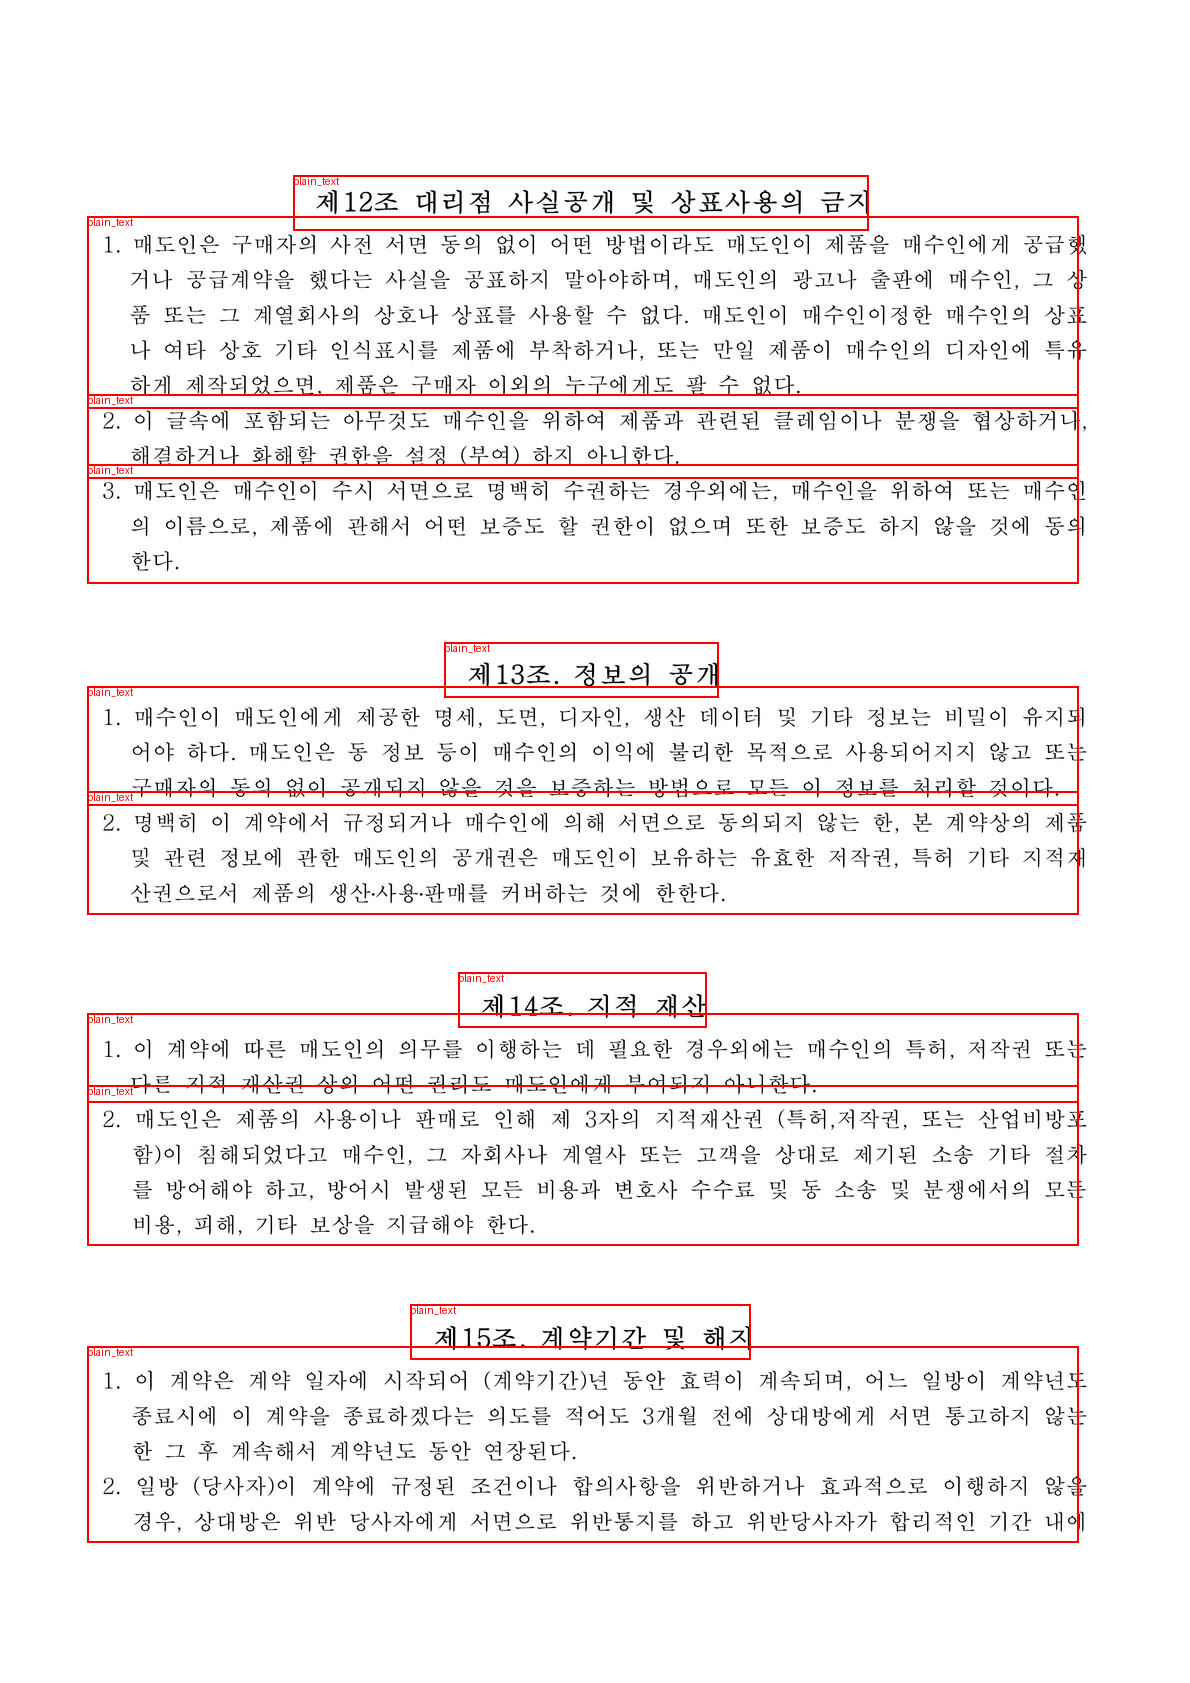

In [160]:
image

In [127]:
target

[{'type': 'plain_text', 'bbox': [123, 90, 904, 156]},
 {'type': 'plain_text', 'bbox': [123, 162, 904, 228]},
 {'type': 'plain_text', 'bbox': [123, 272, 904, 328]},
 {'type': 'plain_text', 'bbox': [123, 334, 904, 354]},
 {'type': 'plain_text', 'bbox': [123, 360, 904, 380]},
 {'type': 'plain_text', 'bbox': [123, 386, 904, 406]},
 {'type': 'plain_text', 'bbox': [123, 412, 904, 432]},
 {'type': 'plain_text', 'bbox': [123, 438, 904, 458]},
 {'type': 'plain_text', 'bbox': [123, 464, 904, 484]},
 {'type': 'plain_text', 'bbox': [123, 490, 904, 510]},
 {'type': 'plain_text', 'bbox': [123, 516, 904, 536]},
 {'type': 'plain_text', 'bbox': [123, 542, 904, 562]},
 {'type': 'plain_text', 'bbox': [123, 568, 904, 588]},
 {'type': 'plain_text', 'bbox': [123, 594, 904, 614]},
 {'type': 'plain_text', 'bbox': [123, 620, 904, 640]},
 {'type': 'plain_text', 'bbox': [123, 646, 904, 666]},
 {'type': 'plain_text', 'bbox': [123, 672, 904, 692]},
 {'type': 'plain_text', 'bbox': [123, 698, 904, 718]},
 {'type': '

In [ ]:
from managers.datalake_client import LocalDataManager
from datasets import Dataset
import os
from datetime import datetime
from glob import glob
manager = LocalDataManager(log_level="DEBUG")

2025-06-13 17:37:32,665 - data_manager - DEBUG - ✅ 모든 필수 디렉토리 확인 완료
2025-06-13 17:37:32,667 - urllib3.connectionpool - DEBUG - Starting new HTTP connection (1): 192.168.20.62:8000
2025-06-13 17:37:32,670 - urllib3.connectionpool - DEBUG - http://192.168.20.62:8000 "GET /health HTTP/11" 200 61
2025-06-13 17:37:32,671 - data_manager - INFO - ✅ NAS API 서버 연결 확인: http://192.168.20.62:8000


In [2]:
parquets = glob("/mnt/AI_NAS/datalake/catalog/provider=*/dataset=*/task=*/**/*.parquet", recursive=True)

In [30]:
manager.wait_for_job_completion(job_id, timeout=1)

2025-06-13 17:36:02,989 - data_manager - INFO - ⏳ 작업 완료 대기 중: job_20250613_173538_889
2025-06-13 17:36:02,993 - urllib3.connectionpool - DEBUG - Starting new HTTP connection (1): 192.168.20.62:8000
2025-06-13 17:36:02,997 - urllib3.connectionpool - DEBUG - http://192.168.20.62:8000 "GET /jobs/job_20250613_173538_889 HTTP/11" 200 190
2025-06-13 17:36:02,999 - data_manager - INFO - ✅ 작업 완료: job_20250613_173538_889
2025-06-13 17:36:03,000 - data_manager - INFO - 📊 처리 결과: 성공=1, 실패=0


{'job_id': 'job_20250613_173538_889',
 'status': 'completed',
 'started_at': '2025-06-13T17:35:38.889457',
 'completed_at': '2025-06-13T17:35:40.573339',
 'result': {'success': 1, 'failed': 0},
 'error': None}

In [ ]:
def apply_image_path(row):
    if row['image_path']:
        path = f"/mnt/AI_NAS/datalake/{row['image_path']}"
        # check path exists
        if os.path.exists(path):
            return path
        raise FileNotFoundError(f"Image path does not exist: {path}")
    return None

for parquet_path in parquets:
    print(parquet_path)
    db = Dataset.from_parquet(parquet_path)
    db = db.map(lambda x: {"image_path": apply_image_path(x)})
    # if db에 date가 없을경우
    if "date" not in db.column_names:
        db = db.map(lambda x: {"date": datetime.now().strftime("%Y-%m-%d")})
        
    sample_image_path = db[0]['image_path']
    
    provider, dataset, task, variant, *etc = parquet_path.replace("/mnt/AI_NAS/datalake/catalog/","").split("/")[:-1]
    provider = provider.replace("provider=", "")
    dataset = dataset.replace("dataset=", "")
    task = task.replace("task=", "")
    variant = variant.replace("variant=", "")
    meta = {}
    for et in etc:
        key, value = et.split("=")
        meta[key] = value
    if "table" in variant:
        meta["mod"] = "table"        

    print(f"provider: {provider}, dataset: {dataset}, task: {task}, variant: {variant}, meta: {meta}")
    temp_path = f"./temp/{provider}/{dataset}/{task}/{variant}"
    db.save_to_disk(temp_path)
    staging_dir, job_id = manager.upload_raw_data(
        data_file=temp_path,
        provider=provider,
        dataset=dataset,
        dataset_description="설명을 변경해주세요.",
        original_source="링크를 입력해주세요.",
    )
    manager.wait_for_job_completion(job_id, timeout=3600)
    uploaded_db = Dataset.from_parquet(f"/mnt/AI_NAS/datalake/migrate_test/catalog/provider={provider}/dataset={dataset}/task=raw/variant=*/data.parquet")
    uploaded_db.save_to_disk(temp_path)
    manager.upload_task_data(
        data_file=temp_path,
        provider=provider,
        dataset=dataset,
        task=task,
        variant=variant,
        dataset_description="설명을 변경해주세요.",
        original_source="링크를 입력해주세요.",
        **meta,  # unpack meta dictionary
    )

2025-06-13 17:56:26,273 - filelock - DEBUG - Attempting to acquire lock 139699541851840 on /home/kai/.cache/huggingface/datasets/_home_kai_.cache_huggingface_datasets_parquet_default-9519d8e4b2835b7c_0.0.0_9d41700293b5cf3c3cee6167e8c49e37598331b6466506aecb40a8c11b6aa9f6.lock
2025-06-13 17:56:26,274 - filelock - DEBUG - Lock 139699541851840 acquired on /home/kai/.cache/huggingface/datasets/_home_kai_.cache_huggingface_datasets_parquet_default-9519d8e4b2835b7c_0.0.0_9d41700293b5cf3c3cee6167e8c49e37598331b6466506aecb40a8c11b6aa9f6.lock
2025-06-13 17:56:26,276 - fsspec.local - DEBUG - open file: /home/kai/.cache/huggingface/datasets/parquet/default-9519d8e4b2835b7c/0.0.0/9d41700293b5cf3c3cee6167e8c49e37598331b6466506aecb40a8c11b6aa9f6/dataset_info.json
2025-06-13 17:56:26,278 - filelock - DEBUG - Attempting to release lock 139699541851840 on /home/kai/.cache/huggingface/datasets/_home_kai_.cache_huggingface_datasets_parquet_default-9519d8e4b2835b7c_0.0.0_9d41700293b5cf3c3cee6167e8c49e37598

/mnt/AI_NAS/datalake/catalog/provider=huggingface/dataset=funsd_plus/task=vqa/variant=base_vqa/lang=en/src=real/data.parquet
provider: huggingface, dataset: funsd_plus, task: vqa, variant: base_vqa, meta: {'lang': 'en', 'src': 'real'}


Saving the dataset (0/1 shards):   0%|          | 0/1112 [00:00<?, ? examples/s]

2025-06-13 17:56:26,320 - fsspec.local - DEBUG - open file: /home/kai/workspace/DeepDocs_Project/datalake/managers/temp/huggingface/funsd_plus/vqa/base_vqa/data-00000-of-00001.arrow
2025-06-13 17:56:26,331 - fsspec.local - DEBUG - open file: /home/kai/workspace/DeepDocs_Project/datalake/managers/temp/huggingface/funsd_plus/vqa/base_vqa/state.json
2025-06-13 17:56:26,333 - fsspec.local - DEBUG - open file: /home/kai/workspace/DeepDocs_Project/datalake/managers/temp/huggingface/funsd_plus/vqa/base_vqa/dataset_info.json
2025-06-13 17:56:26,335 - data_manager - INFO - 📥 Raw data 업로드 시작: huggingface/funsd_plus
2025-06-13 17:56:26,348 - data_manager - DEBUG - 📭 정리할 기존 pending 데이터 없음
2025-06-13 17:56:26,349 - data_manager - INFO - 📂 데이터 파일 로드 중: /home/kai/workspace/DeepDocs_Project/datalake/managers/temp/huggingface/funsd_plus/vqa/base_vqa
2025-06-13 17:56:26,355 - data_manager - INFO - ✅ datasets 폴더 로드 완료: 1112 행
2025-06-13 17:56:26,356 - data_manager - INFO - ✅ 데이터 파일 로드 완료: ./temp/huggingf

Map:   0%|          | 0/1112 [00:00<?, ? examples/s]

2025-06-13 17:56:26,392 - fsspec.local - DEBUG - open file: /home/kai/workspace/DeepDocs_Project/datalake/managers/temp/huggingface/funsd_plus/vqa/base_vqa/tmpr6ucpx1k


Saving the dataset (0/1 shards):   0%|          | 0/1112 [00:00<?, ? examples/s]

2025-06-13 17:56:29,254 - fsspec.local - DEBUG - open file: /mnt/AI_NAS/datalake/migrate_test/staging/pending/funsd_plus_raw_image_7618224d_20250613175626_kai/data-00000-of-00001.arrow
2025-06-13 17:56:29,261 - fsspec.local - DEBUG - open file: /mnt/AI_NAS/datalake/migrate_test/staging/pending/funsd_plus_raw_image_7618224d_20250613175626_kai/state.json
2025-06-13 17:56:29,264 - fsspec.local - DEBUG - open file: /mnt/AI_NAS/datalake/migrate_test/staging/pending/funsd_plus_raw_image_7618224d_20250613175626_kai/dataset_info.json
2025-06-13 17:56:29,267 - data_manager - INFO - 📦 datasets 저장 완료: /mnt/AI_NAS/datalake/migrate_test/staging/pending/funsd_plus_raw_image_7618224d_20250613175626_kai
2025-06-13 17:56:29,268 - data_manager - INFO - ✅ Task 데이터 업로드 완료: /mnt/AI_NAS/datalake/migrate_test/staging/pending/funsd_plus_raw_image_7618224d_20250613175626_kai
2025-06-13 17:56:29,268 - data_manager - INFO - 🔄 NAS 처리 요청 중...
2025-06-13 17:56:29,270 - urllib3.connectionpool - DEBUG - Starting new 

Generating train split: 0 examples [00:00, ? examples/s]

2025-06-13 17:56:39,344 - fsspec.local - DEBUG - open file: /home/kai/.cache/huggingface/datasets/parquet/default-cc99052b9b43ab99/0.0.0/9d41700293b5cf3c3cee6167e8c49e37598331b6466506aecb40a8c11b6aa9f6.incomplete/parquet-train-00000-00000-of-NNNNN.arrow
2025-06-13 17:56:39,365 - filelock - DEBUG - Attempting to acquire lock 139699541841280 on /home/kai/.cache/huggingface/datasets/parquet/default-cc99052b9b43ab99/0.0.0/9d41700293b5cf3c3cee6167e8c49e37598331b6466506aecb40a8c11b6aa9f6.incomplete_info.lock
2025-06-13 17:56:39,366 - filelock - DEBUG - Lock 139699541841280 acquired on /home/kai/.cache/huggingface/datasets/parquet/default-cc99052b9b43ab99/0.0.0/9d41700293b5cf3c3cee6167e8c49e37598331b6466506aecb40a8c11b6aa9f6.incomplete_info.lock
2025-06-13 17:56:39,367 - fsspec.local - DEBUG - open file: /home/kai/.cache/huggingface/datasets/parquet/default-cc99052b9b43ab99/0.0.0/9d41700293b5cf3c3cee6167e8c49e37598331b6466506aecb40a8c11b6aa9f6.incomplete/dataset_info.json
2025-06-13 17:56:39,

Saving the dataset (0/1 shards):   0%|          | 0/1112 [00:00<?, ? examples/s]

2025-06-13 17:56:39,399 - fsspec.local - DEBUG - open file: /home/kai/workspace/DeepDocs_Project/datalake/managers/temp/huggingface/funsd_plus/vqa/base_vqa/data-00000-of-00001.arrow
2025-06-13 17:56:39,414 - fsspec.local - DEBUG - open file: /home/kai/workspace/DeepDocs_Project/datalake/managers/temp/huggingface/funsd_plus/vqa/base_vqa/state.json
2025-06-13 17:56:39,416 - fsspec.local - DEBUG - open file: /home/kai/workspace/DeepDocs_Project/datalake/managers/temp/huggingface/funsd_plus/vqa/base_vqa/dataset_info.json
2025-06-13 17:56:39,418 - data_manager - INFO - 📥 Task data 업로드 시작: huggingface/funsd_plus/vqa/base_vqa
2025-06-13 17:56:39,456 - data_manager - DEBUG - 📭 정리할 기존 pending 데이터 없음
2025-06-13 17:56:39,457 - data_manager - INFO - 📂 데이터 파일 로드 중: /home/kai/workspace/DeepDocs_Project/datalake/managers/temp/huggingface/funsd_plus/vqa/base_vqa
2025-06-13 17:56:39,462 - data_manager - INFO - ✅ datasets 폴더 로드 완료: 1112 행
2025-06-13 17:56:39,463 - data_manager - INFO - ✅ 데이터 파일 로드 완료: .

Saving the dataset (0/1 shards):   0%|          | 0/1112 [00:00<?, ? examples/s]

2025-06-13 17:56:39,513 - fsspec.local - DEBUG - open file: /mnt/AI_NAS/datalake/migrate_test/staging/pending/funsd_plus_vqa_base_vqa_90ad5316_20250613175639_kai/data-00000-of-00001.arrow
2025-06-13 17:56:39,524 - fsspec.local - DEBUG - open file: /mnt/AI_NAS/datalake/migrate_test/staging/pending/funsd_plus_vqa_base_vqa_90ad5316_20250613175639_kai/state.json
2025-06-13 17:56:39,526 - fsspec.local - DEBUG - open file: /mnt/AI_NAS/datalake/migrate_test/staging/pending/funsd_plus_vqa_base_vqa_90ad5316_20250613175639_kai/dataset_info.json
2025-06-13 17:56:39,529 - data_manager - INFO - 📦 datasets 저장 완료: /mnt/AI_NAS/datalake/migrate_test/staging/pending/funsd_plus_vqa_base_vqa_90ad5316_20250613175639_kai
2025-06-13 17:56:39,530 - data_manager - INFO - ✅ Task 데이터 업로드 완료: /mnt/AI_NAS/datalake/migrate_test/staging/pending/funsd_plus_vqa_base_vqa_90ad5316_20250613175639_kai
2025-06-13 17:56:39,531 - data_manager - INFO - 🔄 NAS 처리 요청 중...
2025-06-13 17:56:39,533 - urllib3.connectionpool - DEBUG 

/mnt/AI_NAS/datalake/catalog/provider=huggingface/dataset=funsd_plus/task=kie/variant=base_kie/lang=en/src=real/data.parquet


Generating train split: 0 examples [00:00, ? examples/s]

2025-06-13 17:56:39,574 - fsspec.local - DEBUG - open file: /home/kai/.cache/huggingface/datasets/parquet/default-e2cffabc66a6adc9/0.0.0/9d41700293b5cf3c3cee6167e8c49e37598331b6466506aecb40a8c11b6aa9f6.incomplete/parquet-train-00000-00000-of-NNNNN.arrow
2025-06-13 17:56:39,590 - filelock - DEBUG - Attempting to acquire lock 139699550240992 on /home/kai/.cache/huggingface/datasets/parquet/default-e2cffabc66a6adc9/0.0.0/9d41700293b5cf3c3cee6167e8c49e37598331b6466506aecb40a8c11b6aa9f6.incomplete_info.lock
2025-06-13 17:56:39,592 - filelock - DEBUG - Lock 139699550240992 acquired on /home/kai/.cache/huggingface/datasets/parquet/default-e2cffabc66a6adc9/0.0.0/9d41700293b5cf3c3cee6167e8c49e37598331b6466506aecb40a8c11b6aa9f6.incomplete_info.lock
2025-06-13 17:56:39,593 - fsspec.local - DEBUG - open file: /home/kai/.cache/huggingface/datasets/parquet/default-e2cffabc66a6adc9/0.0.0/9d41700293b5cf3c3cee6167e8c49e37598331b6466506aecb40a8c11b6aa9f6.incomplete/dataset_info.json
2025-06-13 17:56:39,

Map:   0%|          | 0/1112 [00:00<?, ? examples/s]

2025-06-13 17:56:39,615 - fsspec.local - DEBUG - open file: /home/kai/.cache/huggingface/datasets/parquet/default-e2cffabc66a6adc9/0.0.0/9d41700293b5cf3c3cee6167e8c49e37598331b6466506aecb40a8c11b6aa9f6/tmpazm6tklh


provider: huggingface, dataset: funsd_plus, task: kie, variant: base_kie, meta: {'lang': 'en', 'src': 'real'}


Saving the dataset (0/1 shards):   0%|          | 0/1112 [00:00<?, ? examples/s]

2025-06-13 17:56:39,727 - fsspec.local - DEBUG - open file: /home/kai/workspace/DeepDocs_Project/datalake/managers/temp/huggingface/funsd_plus/kie/base_kie/data-00000-of-00001.arrow
2025-06-13 17:56:39,732 - fsspec.local - DEBUG - open file: /home/kai/workspace/DeepDocs_Project/datalake/managers/temp/huggingface/funsd_plus/kie/base_kie/state.json
2025-06-13 17:56:39,733 - fsspec.local - DEBUG - open file: /home/kai/workspace/DeepDocs_Project/datalake/managers/temp/huggingface/funsd_plus/kie/base_kie/dataset_info.json
2025-06-13 17:56:39,734 - data_manager - INFO - 📥 Raw data 업로드 시작: huggingface/funsd_plus
2025-06-13 17:56:39,741 - data_manager - DEBUG - 📭 정리할 기존 pending 데이터 없음
2025-06-13 17:56:39,742 - data_manager - INFO - 📂 데이터 파일 로드 중: /home/kai/workspace/DeepDocs_Project/datalake/managers/temp/huggingface/funsd_plus/kie/base_kie
2025-06-13 17:56:39,745 - data_manager - INFO - ✅ datasets 폴더 로드 완료: 1112 행
2025-06-13 17:56:39,746 - data_manager - INFO - ✅ 데이터 파일 로드 완료: ./temp/huggingf

Map:   0%|          | 0/1112 [00:00<?, ? examples/s]

2025-06-13 17:56:39,765 - fsspec.local - DEBUG - open file: /home/kai/workspace/DeepDocs_Project/datalake/managers/temp/huggingface/funsd_plus/kie/base_kie/tmpmqg0cs7w


Saving the dataset (0/1 shards):   0%|          | 0/1112 [00:00<?, ? examples/s]

2025-06-13 17:56:42,450 - fsspec.local - DEBUG - open file: /mnt/AI_NAS/datalake/migrate_test/staging/pending/funsd_plus_raw_image_dde4762a_20250613175639_kai/data-00000-of-00001.arrow
2025-06-13 17:56:42,458 - fsspec.local - DEBUG - open file: /mnt/AI_NAS/datalake/migrate_test/staging/pending/funsd_plus_raw_image_dde4762a_20250613175639_kai/state.json
2025-06-13 17:56:42,461 - fsspec.local - DEBUG - open file: /mnt/AI_NAS/datalake/migrate_test/staging/pending/funsd_plus_raw_image_dde4762a_20250613175639_kai/dataset_info.json
2025-06-13 17:56:42,464 - data_manager - INFO - 📦 datasets 저장 완료: /mnt/AI_NAS/datalake/migrate_test/staging/pending/funsd_plus_raw_image_dde4762a_20250613175639_kai
2025-06-13 17:56:42,464 - data_manager - INFO - ✅ Task 데이터 업로드 완료: /mnt/AI_NAS/datalake/migrate_test/staging/pending/funsd_plus_raw_image_dde4762a_20250613175639_kai
2025-06-13 17:56:42,465 - data_manager - INFO - 🔄 NAS 처리 요청 중...
2025-06-13 17:56:42,467 - urllib3.connectionpool - DEBUG - Starting new 

Generating train split: 0 examples [00:00, ? examples/s]

2025-06-13 17:56:52,540 - fsspec.local - DEBUG - open file: /home/kai/.cache/huggingface/datasets/parquet/default-bac3afe6a2b4b83b/0.0.0/9d41700293b5cf3c3cee6167e8c49e37598331b6466506aecb40a8c11b6aa9f6.incomplete/parquet-train-00000-00000-of-NNNNN.arrow
2025-06-13 17:56:52,560 - filelock - DEBUG - Attempting to acquire lock 139699541454976 on /home/kai/.cache/huggingface/datasets/parquet/default-bac3afe6a2b4b83b/0.0.0/9d41700293b5cf3c3cee6167e8c49e37598331b6466506aecb40a8c11b6aa9f6.incomplete_info.lock
2025-06-13 17:56:52,561 - filelock - DEBUG - Lock 139699541454976 acquired on /home/kai/.cache/huggingface/datasets/parquet/default-bac3afe6a2b4b83b/0.0.0/9d41700293b5cf3c3cee6167e8c49e37598331b6466506aecb40a8c11b6aa9f6.incomplete_info.lock
2025-06-13 17:56:52,562 - fsspec.local - DEBUG - open file: /home/kai/.cache/huggingface/datasets/parquet/default-bac3afe6a2b4b83b/0.0.0/9d41700293b5cf3c3cee6167e8c49e37598331b6466506aecb40a8c11b6aa9f6.incomplete/dataset_info.json
2025-06-13 17:56:52,

Saving the dataset (0/1 shards):   0%|          | 0/1112 [00:00<?, ? examples/s]

2025-06-13 17:56:52,593 - fsspec.local - DEBUG - open file: /home/kai/workspace/DeepDocs_Project/datalake/managers/temp/huggingface/funsd_plus/kie/base_kie/data-00000-of-00001.arrow
2025-06-13 17:56:52,605 - fsspec.local - DEBUG - open file: /home/kai/workspace/DeepDocs_Project/datalake/managers/temp/huggingface/funsd_plus/kie/base_kie/state.json
2025-06-13 17:56:52,607 - fsspec.local - DEBUG - open file: /home/kai/workspace/DeepDocs_Project/datalake/managers/temp/huggingface/funsd_plus/kie/base_kie/dataset_info.json
2025-06-13 17:56:52,609 - data_manager - INFO - 📥 Task data 업로드 시작: huggingface/funsd_plus/kie/base_kie
2025-06-13 17:56:52,648 - data_manager - DEBUG - 📭 정리할 기존 pending 데이터 없음
2025-06-13 17:56:52,649 - data_manager - INFO - 📂 데이터 파일 로드 중: /home/kai/workspace/DeepDocs_Project/datalake/managers/temp/huggingface/funsd_plus/kie/base_kie
2025-06-13 17:56:52,655 - data_manager - INFO - ✅ datasets 폴더 로드 완료: 1112 행
2025-06-13 17:56:52,655 - data_manager - INFO - ✅ 데이터 파일 로드 완료: .

Saving the dataset (0/1 shards):   0%|          | 0/1112 [00:00<?, ? examples/s]

2025-06-13 17:56:52,704 - fsspec.local - DEBUG - open file: /mnt/AI_NAS/datalake/migrate_test/staging/pending/funsd_plus_kie_base_kie_5b88ce1f_20250613175652_kai/data-00000-of-00001.arrow
2025-06-13 17:56:52,715 - fsspec.local - DEBUG - open file: /mnt/AI_NAS/datalake/migrate_test/staging/pending/funsd_plus_kie_base_kie_5b88ce1f_20250613175652_kai/state.json
2025-06-13 17:56:52,718 - fsspec.local - DEBUG - open file: /mnt/AI_NAS/datalake/migrate_test/staging/pending/funsd_plus_kie_base_kie_5b88ce1f_20250613175652_kai/dataset_info.json
2025-06-13 17:56:52,721 - data_manager - INFO - 📦 datasets 저장 완료: /mnt/AI_NAS/datalake/migrate_test/staging/pending/funsd_plus_kie_base_kie_5b88ce1f_20250613175652_kai
2025-06-13 17:56:52,722 - data_manager - INFO - ✅ Task 데이터 업로드 완료: /mnt/AI_NAS/datalake/migrate_test/staging/pending/funsd_plus_kie_base_kie_5b88ce1f_20250613175652_kai
2025-06-13 17:56:52,723 - data_manager - INFO - 🔄 NAS 처리 요청 중...
2025-06-13 17:56:52,724 - urllib3.connectionpool - DEBUG 

/mnt/AI_NAS/datalake/catalog/provider=huggingface/dataset=pubtabnet_otsl_test/task=document_conversion/variant=table_image_otsl/lang=en/src=real/data.parquet


Generating train split: 0 examples [00:00, ? examples/s]

2025-06-13 17:56:52,768 - fsspec.local - DEBUG - open file: /home/kai/.cache/huggingface/datasets/parquet/default-8baab9c81e28ad00/0.0.0/9d41700293b5cf3c3cee6167e8c49e37598331b6466506aecb40a8c11b6aa9f6.incomplete/parquet-train-00000-00000-of-NNNNN.arrow
2025-06-13 17:56:52,858 - filelock - DEBUG - Attempting to acquire lock 139699541236128 on /home/kai/.cache/huggingface/datasets/parquet/default-8baab9c81e28ad00/0.0.0/9d41700293b5cf3c3cee6167e8c49e37598331b6466506aecb40a8c11b6aa9f6.incomplete_info.lock
2025-06-13 17:56:52,860 - filelock - DEBUG - Lock 139699541236128 acquired on /home/kai/.cache/huggingface/datasets/parquet/default-8baab9c81e28ad00/0.0.0/9d41700293b5cf3c3cee6167e8c49e37598331b6466506aecb40a8c11b6aa9f6.incomplete_info.lock
2025-06-13 17:56:52,861 - fsspec.local - DEBUG - open file: /home/kai/.cache/huggingface/datasets/parquet/default-8baab9c81e28ad00/0.0.0/9d41700293b5cf3c3cee6167e8c49e37598331b6466506aecb40a8c11b6aa9f6.incomplete/dataset_info.json
2025-06-13 17:56:52,

Map:   0%|          | 0/6941 [00:00<?, ? examples/s]

2025-06-13 17:56:52,893 - fsspec.local - DEBUG - open file: /home/kai/.cache/huggingface/datasets/parquet/default-8baab9c81e28ad00/0.0.0/9d41700293b5cf3c3cee6167e8c49e37598331b6466506aecb40a8c11b6aa9f6/tmpb3b2c9hj


provider: huggingface, dataset: pubtabnet_otsl_test, task: document_conversion, variant: table_image_otsl, meta: {'lang': 'en', 'src': 'real'}


Saving the dataset (0/1 shards):   0%|          | 0/6941 [00:00<?, ? examples/s]

2025-06-13 17:56:55,479 - fsspec.local - DEBUG - open file: /home/kai/workspace/DeepDocs_Project/datalake/managers/temp/huggingface/pubtabnet_otsl_test/document_conversion/table_image_otsl/data-00000-of-00001.arrow
2025-06-13 17:56:55,496 - fsspec.local - DEBUG - open file: /home/kai/workspace/DeepDocs_Project/datalake/managers/temp/huggingface/pubtabnet_otsl_test/document_conversion/table_image_otsl/state.json
2025-06-13 17:56:55,498 - fsspec.local - DEBUG - open file: /home/kai/workspace/DeepDocs_Project/datalake/managers/temp/huggingface/pubtabnet_otsl_test/document_conversion/table_image_otsl/dataset_info.json
2025-06-13 17:56:55,499 - data_manager - INFO - 📥 Raw data 업로드 시작: huggingface/pubtabnet_otsl_test
2025-06-13 17:56:55,506 - data_manager - DEBUG - 📭 정리할 기존 pending 데이터 없음
2025-06-13 17:56:55,507 - data_manager - INFO - 📂 데이터 파일 로드 중: /home/kai/workspace/DeepDocs_Project/datalake/managers/temp/huggingface/pubtabnet_otsl_test/document_conversion/table_image_otsl
2025-06-13 17:

Map:   0%|          | 0/6941 [00:00<?, ? examples/s]

2025-06-13 17:56:55,539 - fsspec.local - DEBUG - open file: /home/kai/workspace/DeepDocs_Project/datalake/managers/temp/huggingface/pubtabnet_otsl_test/document_conversion/table_image_otsl/tmp5rqxyybu


Saving the dataset (0/1 shards):   0%|          | 0/6941 [00:00<?, ? examples/s]

2025-06-13 17:57:15,505 - fsspec.local - DEBUG - open file: /mnt/AI_NAS/datalake/migrate_test/staging/pending/pubtabnet_otsl_test_raw_image_b2db6668_20250613175655_kai/data-00000-of-00001.arrow
2025-06-13 17:57:15,527 - fsspec.local - DEBUG - open file: /mnt/AI_NAS/datalake/migrate_test/staging/pending/pubtabnet_otsl_test_raw_image_b2db6668_20250613175655_kai/state.json
2025-06-13 17:57:15,530 - fsspec.local - DEBUG - open file: /mnt/AI_NAS/datalake/migrate_test/staging/pending/pubtabnet_otsl_test_raw_image_b2db6668_20250613175655_kai/dataset_info.json
2025-06-13 17:57:15,532 - data_manager - INFO - 📦 datasets 저장 완료: /mnt/AI_NAS/datalake/migrate_test/staging/pending/pubtabnet_otsl_test_raw_image_b2db6668_20250613175655_kai
2025-06-13 17:57:15,533 - data_manager - INFO - ✅ Task 데이터 업로드 완료: /mnt/AI_NAS/datalake/migrate_test/staging/pending/pubtabnet_otsl_test_raw_image_b2db6668_20250613175655_kai
2025-06-13 17:57:15,535 - data_manager - INFO - 🔄 NAS 처리 요청 중...
2025-06-13 17:57:15,537 - u

Generating train split: 0 examples [00:00, ? examples/s]

2025-06-13 17:57:25,603 - fsspec.local - DEBUG - open file: /home/kai/.cache/huggingface/datasets/parquet/default-711cc6d6cd98eb4e/0.0.0/9d41700293b5cf3c3cee6167e8c49e37598331b6466506aecb40a8c11b6aa9f6.incomplete/parquet-train-00000-00000-of-NNNNN.arrow
2025-06-13 17:57:25,696 - filelock - DEBUG - Attempting to acquire lock 139699541146272 on /home/kai/.cache/huggingface/datasets/parquet/default-711cc6d6cd98eb4e/0.0.0/9d41700293b5cf3c3cee6167e8c49e37598331b6466506aecb40a8c11b6aa9f6.incomplete_info.lock
2025-06-13 17:57:25,698 - filelock - DEBUG - Lock 139699541146272 acquired on /home/kai/.cache/huggingface/datasets/parquet/default-711cc6d6cd98eb4e/0.0.0/9d41700293b5cf3c3cee6167e8c49e37598331b6466506aecb40a8c11b6aa9f6.incomplete_info.lock
2025-06-13 17:57:25,699 - fsspec.local - DEBUG - open file: /home/kai/.cache/huggingface/datasets/parquet/default-711cc6d6cd98eb4e/0.0.0/9d41700293b5cf3c3cee6167e8c49e37598331b6466506aecb40a8c11b6aa9f6.incomplete/dataset_info.json
2025-06-13 17:57:25,

Saving the dataset (0/1 shards):   0%|          | 0/6941 [00:00<?, ? examples/s]

2025-06-13 17:57:25,732 - fsspec.local - DEBUG - open file: /home/kai/workspace/DeepDocs_Project/datalake/managers/temp/huggingface/pubtabnet_otsl_test/document_conversion/table_image_otsl/data-00000-of-00001.arrow
2025-06-13 17:57:25,766 - fsspec.local - DEBUG - open file: /home/kai/workspace/DeepDocs_Project/datalake/managers/temp/huggingface/pubtabnet_otsl_test/document_conversion/table_image_otsl/state.json
2025-06-13 17:57:25,769 - fsspec.local - DEBUG - open file: /home/kai/workspace/DeepDocs_Project/datalake/managers/temp/huggingface/pubtabnet_otsl_test/document_conversion/table_image_otsl/dataset_info.json
2025-06-13 17:57:25,771 - data_manager - INFO - 📥 Task data 업로드 시작: huggingface/pubtabnet_otsl_test/document_conversion/table_image_otsl


ValueError: ❌ Task 메타데이터 검증 실패: 필수 필드 'mod'가 없습니다

In [4]:
db = Dataset.from_parquet(f"/mnt/AI_NAS/datalake/migrate_test/catalog/provider={provider}/dataset={dataset}/task=vqa/variant=*/data.parquet")

2025-06-13 17:39:02,855 - filelock - DEBUG - Attempting to acquire lock 139696623488368 on /home/kai/.cache/huggingface/datasets/_home_kai_.cache_huggingface_datasets_parquet_default-11d0f065d58d77a7_0.0.0_9d41700293b5cf3c3cee6167e8c49e37598331b6466506aecb40a8c11b6aa9f6.lock
2025-06-13 17:39:02,856 - filelock - DEBUG - Lock 139696623488368 acquired on /home/kai/.cache/huggingface/datasets/_home_kai_.cache_huggingface_datasets_parquet_default-11d0f065d58d77a7_0.0.0_9d41700293b5cf3c3cee6167e8c49e37598331b6466506aecb40a8c11b6aa9f6.lock
2025-06-13 17:39:02,857 - filelock - DEBUG - Attempting to release lock 139696623488368 on /home/kai/.cache/huggingface/datasets/_home_kai_.cache_huggingface_datasets_parquet_default-11d0f065d58d77a7_0.0.0_9d41700293b5cf3c3cee6167e8c49e37598331b6466506aecb40a8c11b6aa9f6.lock
2025-06-13 17:39:02,859 - filelock - DEBUG - Lock 139696623488368 released on /home/kai/.cache/huggingface/datasets/_home_kai_.cache_huggingface_datasets_parquet_default-11d0f065d58d77a

Generating train split: 0 examples [00:00, ? examples/s]

2025-06-13 17:39:02,899 - fsspec.local - DEBUG - open file: /home/kai/.cache/huggingface/datasets/parquet/default-11d0f065d58d77a7/0.0.0/9d41700293b5cf3c3cee6167e8c49e37598331b6466506aecb40a8c11b6aa9f6.incomplete/parquet-train-00000-00000-of-NNNNN.arrow
2025-06-13 17:39:02,913 - filelock - DEBUG - Attempting to acquire lock 139699564621952 on /home/kai/.cache/huggingface/datasets/parquet/default-11d0f065d58d77a7/0.0.0/9d41700293b5cf3c3cee6167e8c49e37598331b6466506aecb40a8c11b6aa9f6.incomplete_info.lock
2025-06-13 17:39:02,914 - filelock - DEBUG - Lock 139699564621952 acquired on /home/kai/.cache/huggingface/datasets/parquet/default-11d0f065d58d77a7/0.0.0/9d41700293b5cf3c3cee6167e8c49e37598331b6466506aecb40a8c11b6aa9f6.incomplete_info.lock
2025-06-13 17:39:02,915 - fsspec.local - DEBUG - open file: /home/kai/.cache/huggingface/datasets/parquet/default-11d0f065d58d77a7/0.0.0/9d41700293b5cf3c3cee6167e8c49e37598331b6466506aecb40a8c11b6aa9f6.incomplete/dataset_info.json
2025-06-13 17:39:02,

In [8]:
db[0]

{'query': 'This is a FAX COVER SHEET document. Please extract the following fields and return the result in the same JSON',
 'label': '{"FROM:": {"<|value|>": "Marco Giamberardino The Tobacco Institute 1875 I Street, N.W ., Suite 800 EPA Liga Washington, DC 20006 (202) 457-4800 (202) 457-9350 (FAX)", "<|bbox|>": [0.2248, 0.2745, 0.8297, 0.3908]}, "ID:": {"<|value|>": "2024579311", "<|bbox|>": [0.5748, 0.066, 0.6802, 0.0787]}, "PAGE": {"<|value|>": "1/4", "<|bbox|>": [0.8815, 0.0667, 0.9106, 0.0787]}, "TO:": {"<|value|>": "Mark Berlind", "<|bbox|>": [0.2267, 0.2156, 0.3547, 0.2326]}, "DATE:": {"<|value|>": "July 24, 1998", "<|bbox|>": [0.2248, 0.4085, 0.3471, 0.427]}, "Recipient\'s Fax Number:": {"<|value|>": "212-907-5805", "<|bbox|>": [0.3697, 0.7426, 0.4939, 0.7624]}}',
 'width': 1063,
 'height': 1410,
 'date': '2025-06-09',
 'path': 'provider=huggingface/dataset=funsd_plus/files/0c515a5ac5b055b3dfcd220bee34694fd1ac39c84d85cdc0cadf32aac07dd43e.jpg',
 'hash': '0c515a5ac5b055b3dfcd220b

In [18]:
uploaded_db = Dataset.from_parquet(f"/mnt/AI_NAS/datalake/migrate_test/catalog/provider={provider}/dataset={dataset}/task=raw/variant=*/data.parquet")

2025-06-13 17:30:32,332 - filelock - DEBUG - Attempting to acquire lock 140157465165456 on /home/kai/.cache/huggingface/datasets/_home_kai_.cache_huggingface_datasets_parquet_default-7a76eaf8f8846581_0.0.0_9d41700293b5cf3c3cee6167e8c49e37598331b6466506aecb40a8c11b6aa9f6.lock
2025-06-13 17:30:32,334 - filelock - DEBUG - Lock 140157465165456 acquired on /home/kai/.cache/huggingface/datasets/_home_kai_.cache_huggingface_datasets_parquet_default-7a76eaf8f8846581_0.0.0_9d41700293b5cf3c3cee6167e8c49e37598331b6466506aecb40a8c11b6aa9f6.lock
2025-06-13 17:30:32,335 - filelock - DEBUG - Attempting to release lock 140157465165456 on /home/kai/.cache/huggingface/datasets/_home_kai_.cache_huggingface_datasets_parquet_default-7a76eaf8f8846581_0.0.0_9d41700293b5cf3c3cee6167e8c49e37598331b6466506aecb40a8c11b6aa9f6.lock
2025-06-13 17:30:32,336 - filelock - DEBUG - Lock 140157465165456 released on /home/kai/.cache/huggingface/datasets/_home_kai_.cache_huggingface_datasets_parquet_default-7a76eaf8f884658

Generating train split: 0 examples [00:00, ? examples/s]

2025-06-13 17:30:32,378 - fsspec.local - DEBUG - open file: /home/kai/.cache/huggingface/datasets/parquet/default-7a76eaf8f8846581/0.0.0/9d41700293b5cf3c3cee6167e8c49e37598331b6466506aecb40a8c11b6aa9f6.incomplete/parquet-train-00000-00000-of-NNNNN.arrow
2025-06-13 17:30:32,403 - filelock - DEBUG - Attempting to acquire lock 140157400433248 on /home/kai/.cache/huggingface/datasets/parquet/default-7a76eaf8f8846581/0.0.0/9d41700293b5cf3c3cee6167e8c49e37598331b6466506aecb40a8c11b6aa9f6.incomplete_info.lock
2025-06-13 17:30:32,405 - filelock - DEBUG - Lock 140157400433248 acquired on /home/kai/.cache/huggingface/datasets/parquet/default-7a76eaf8f8846581/0.0.0/9d41700293b5cf3c3cee6167e8c49e37598331b6466506aecb40a8c11b6aa9f6.incomplete_info.lock
2025-06-13 17:30:32,406 - fsspec.local - DEBUG - open file: /home/kai/.cache/huggingface/datasets/parquet/default-7a76eaf8f8846581/0.0.0/9d41700293b5cf3c3cee6167e8c49e37598331b6466506aecb40a8c11b6aa9f6.incomplete/dataset_info.json
2025-06-13 17:30:32,

In [20]:
uploaded_db

Dataset({
    features: ['query', 'label', 'width', 'height', 'date', 'path', 'hash'],
    num_rows: 1112
})

In [ ]:
manager.upload_raw_data(
    data_file="arrow경로",
    provider="provider_name",
    dataset="dataset_name",
    dataset_description="설명을 변경해주세요.",
    original_source="링크를 입력해주세요.",
)

In [ ]:
manager.upload_task_data(
    data_file=parquet_path,
    provider=provider,
    dataset=dataset,
    task=task,
    variant=variant,
    dataset_description="설명을 변경해주세요.",
    original_source="링크를 입력해주세요.",
    **meta,  # unpack meta dictionary
)

In [91]:
db

Dataset({
    features: ['image_path', 'query', 'label', 'width', 'height', 'date'],
    num_rows: 1112
})